In [6]:
import sqlite3
conn = sqlite3.connect(r"C:\Users\harsh\OneDrive\Desktop\sales_data.db")


In [7]:
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""


In [8]:
import pandas as pd
df = pd.read_sql_query(query, conn)


In [9]:
print(df)


  product  total_qty  revenue
0   Apple         25     62.5
1  Banana         20     20.0
2  Orange         12     36.0


<Axes: xlabel='product'>

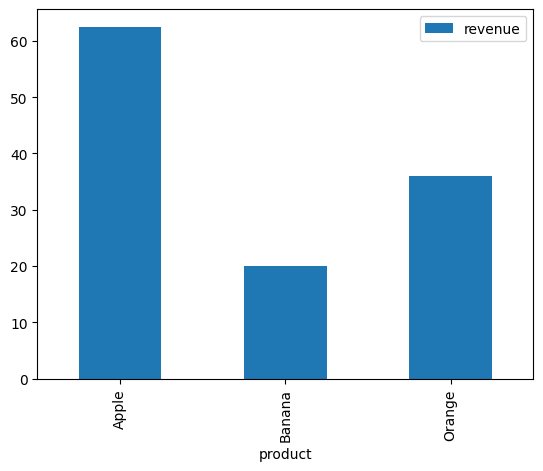

In [10]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='product', y='revenue')


In [12]:
plt.savefig("sales_chart.png")
plt.show()


<Figure size 640x480 with 0 Axes>

In [13]:
conn.close()


In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect(r"C:\Users\harsh\OneDrive\Desktop\sales_data.db")

# 1. Top-Selling Product (by quantity)
query1 = """
SELECT product, SUM(quantity) AS total_quantity
FROM sales
GROUP BY product
ORDER BY total_quantity DESC
LIMIT 1;
"""
df1 = pd.read_sql_query(query1, conn)
print("Top-Selling Product:\n", df1)

Top-Selling Product:
   product  total_quantity
0   Apple              25



💰 Average Price per Product:
   product  avg_price
0   Apple        2.5
1  Banana        1.0
2  Orange        3.0


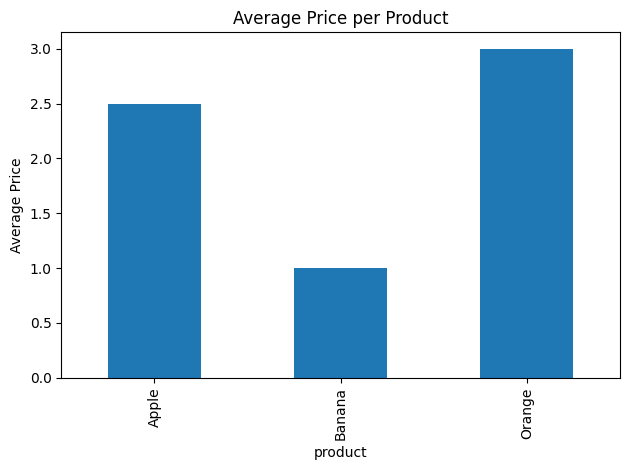

In [15]:
# 2. Average Price per Product
query2 = """
SELECT product, AVG(price) AS avg_price
FROM sales
GROUP BY product;
"""
df2 = pd.read_sql_query(query2, conn)
print("\n💰 Average Price per Product:\n", df2)

# Optional: Bar plot for average price
df2.plot(kind='bar', x='product', y='avg_price', title='Average Price per Product', legend=False)
plt.ylabel("Average Price")
plt.tight_layout()
plt.savefig("avg_price_chart.png")
plt.show()

In [16]:
# 3. Total Revenue and Quantity Summary
query3 = """
SELECT SUM(quantity) AS total_units_sold,
       SUM(quantity * price) AS total_revenue
FROM sales;
"""
df3 = pd.read_sql_query(query3, conn)
print("\n📊 Total Summary:\n", df3)

# Close the connection
conn.close()


📊 Total Summary:
    total_units_sold  total_revenue
0                57          118.5
